In [2]:
import pandas as pd

columns = ['tweet_id','airline_sentiment','airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold','name','negativereason_gold','retweet_count','text','tweet_location','user_timezone','tweet_created']

df = pd.read_csv("/content/Tweets.csv", usecols= columns)

print("Count of Data Samples:", len(df))

Count of Data Samples: 14640


In [3]:
pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [4]:
airline_sentiment = list(df['airline_sentiment'])
negativereason = list(df['negativereason'])

airline_sentiment_unique = list(set(airline_sentiment))
negativereason_unique = list(set(negativereason))

print("Number of Unique 'Airline Sentiment' values: ",len(airline_sentiment_unique))
print("Number of Unique 'Negative Reason' values: ",len(negativereason_unique))

Number of Unique 'Airline Sentiment' values:  3
Number of Unique 'Negative Reason' values:  11


In [5]:
from collections import  Counter

airline_sentiment_fd = Counter(airline_sentiment)
negativereason_fd = Counter(negativereason)

print("Frequency of 'Airline Sentiment' values: ", dict(airline_sentiment_fd))
print("\nFrequency of 'Negative Reason' values: ", dict(negativereason_fd))

print("\nMost frequent 'Airline Sentiment' and its frequency : ", list(airline_sentiment_fd.most_common(1)[0]))
print("\nMost frequent 'Negative Reason' and its frequency : ", list(negativereason_fd.most_common(1)[0]))

Frequency of 'Airline Sentiment' values:  {'neutral': 3099, 'positive': 2363, 'negative': 9178}

Frequency of 'Negative Reason' values:  {nan: 5462, 'Bad Flight': 580, "Can't Tell": 1190, 'Late Flight': 1665, 'Customer Service Issue': 2910, 'Flight Booking Problems': 529, 'Lost Luggage': 724, 'Flight Attendant Complaints': 481, 'Cancelled Flight': 847, 'Damaged Luggage': 74, 'longlines': 178}

Most frequent 'Airline Sentiment' and its frequency :  ['negative', 9178]

Most frequent 'Negative Reason' and its frequency :  [nan, 5462]


In [6]:
tweets = df['text']

max_tweet = max(tweets, key = len)
min_tweet = min(tweets, key = len)

print("\nLongest tweet in the dataset: ",max_tweet) 
print("\nLongest tweet length: ",len(max_tweet))
print("\nShortest tweet in the dataset: ", min_tweet)
print("\nShortest tweet length: ",len(min_tweet))



Longest tweet in the dataset:  @USAirways Eyyyy! Cancelled Flightlations, Flight Booking Problemss, reFlight Booking Problemss, but y'all got me on the same flight out tonight (not tomorrow) &amp; the FC upgrade. Thx!

Longest tweet length:  186

Shortest tweet in the dataset:  @united done

Shortest tweet length:  12


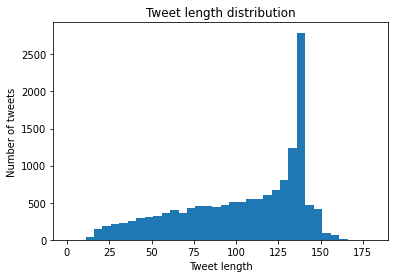

In [7]:
import matplotlib.pyplot as plt
import numpy as np

tweet_len = [len(i) for i in tweets]

nearest_multiple = 5 * round(len(max_tweet)/5)

bin = [ j for j in range(1,len(max_tweet),5)]

fig, ax = plt.subplots(1, 1)

ax.set_title("Tweet length distribution")
ax.set_xlabel('Tweet length')
ax.set_ylabel('Number of tweets')

# print(bin)
ax.hist(tweet_len, bins= bin )
plt.show() 

#Part B (Add different color & check x axis for sentiments)

In [8]:
df2 = df[['airline','airline_sentiment']]

df_virgin = df2[df['airline'] == 'Virgin America']
df_american = df2[df['airline'] == 'American']
df_Delta = df2[df['airline'] == 'Delta']
df_Airways = df2[df['airline'] == 'US Airways']
df_United = df2[df['airline'] == 'United']
df_Southwest = df2[df['airline'] == 'Southwest']

df_Southwest = df_Southwest.groupby(['airline_sentiment']).count()
df_Southwest= df_Southwest.rename(columns={"airline": "Southwest"})
df_virgin = df_virgin.groupby(['airline_sentiment']).count()
df_virgin = df_virgin.rename(columns={"airline": "Virgin"})
df_american = df_american.groupby(['airline_sentiment']).count()
df_american = df_american.rename(columns={"airline": "American"})
df_Delta = df_Delta.groupby(['airline_sentiment']).count()
df_Delta = df_Delta.rename(columns={"airline": "Delta"})
df_Airways = df_Airways.groupby(['airline_sentiment']).count()
df_Airways = df_Airways.rename(columns={"airline": "US Airways"})
df_United = df_United.groupby(['airline_sentiment']).count()
df_United = df_United.rename(columns={"airline": "United"})

df_final = pd.concat([df_Southwest, df_virgin, df_american, df_Delta, df_Airways, df_United], axis=1)
df_final

,Southwest,Virgin,American,Delta,US Airways,United
airline_sentiment,,,,,,
negative,1186,181,1960,955,2263,2633
neutral,664,171,463,723,381,697
positive,570,152,336,544,269,492


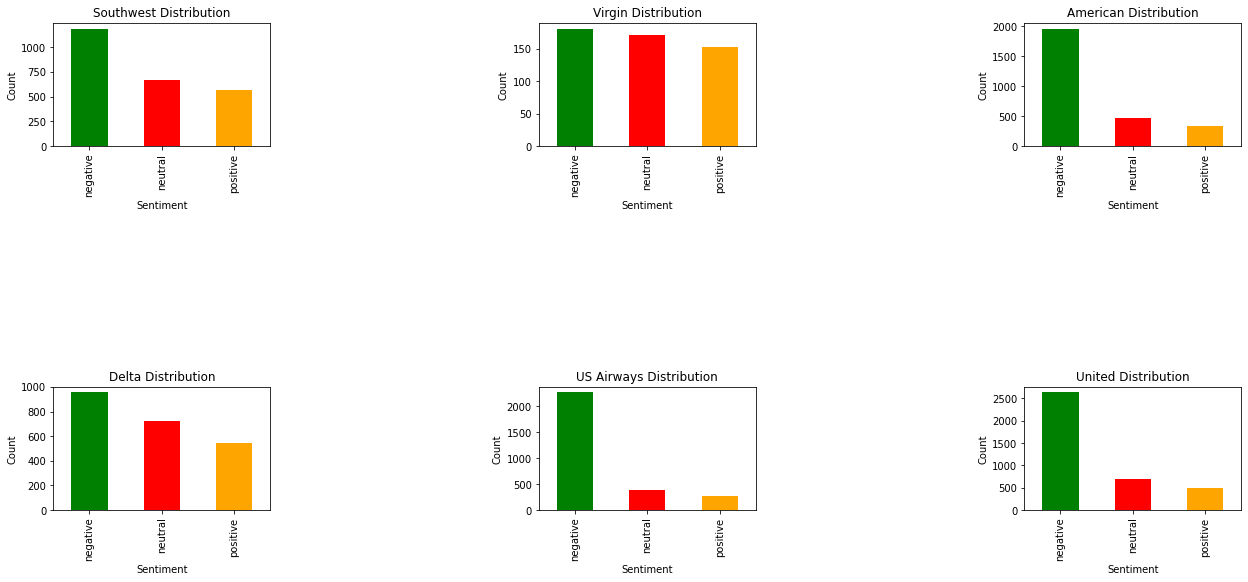

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    colors = ['orange','green','red']
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        # plt.hist(ax=ax, colors = colors)
        my_colors = ['green','red','orange']
        df[var_name].plot(kind='bar', stacked=True, color=my_colors)
        
        ax.set_xlabel('Sentiment')
        ax.set_ylabel('Count')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    fig.set_size_inches(20.5, 10.5)
    plt.show()

draw_histograms(df_final, df_final.columns, 2, 3)

#part c

In [10]:
import re

def tokenize(str):
  
  split_pattern = rf"(\w+')(?:\W+|$)|('\w+)|(?:\s+)|(\W)"

  tokens = [x for x in re.split(r"([^'\w\s]|'(?![^\W\d_])|(?<![^\W\d_])')|(?='(?<=[^\W\d_]')(?=[^\W\d_]))|\s+", str) if x]

  return tokens

words = tokenize("Who's kid are you talking about +91-9444929219.")
print(words)

['Who', "'s", 'kid', 'are', 'you', 'talking', 'about', '+', '91', '-', '9444929219', '.']


In [ ]:
tweets = list(df['text'])

tokenized_tweets = [tokenize(i) for i in tweets]

print(tokenized_tweets)

# Part D

In [12]:
import nltk
nltk.download('punkt')

df_tokenized = pd.DataFrame(columns=['NLTK', 'Sriram'])

for i in tweets:
  
  df_tokenized.loc[len(df_tokenized)] = [nltk.word_tokenize(i), tokenize(i)]

print(df_tokenized)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Part E

In [13]:
location_NaN = len(df[df['tweet_location'].isna() == True])
timezone_NaN = len(df[df['user_timezone'].isna() == True])

print("number of missing values for tweet-location", location_NaN)
print("number of missing values for user_timezone", timezone_NaN)

number of missing values for tweet-location 4733
number of missing values for user_timezone 4820


In [14]:
df['tweet_created']= pd.to_datetime(df['tweet_created'])

for j in df['tweet_created'].head():
  print(j, " ---> is now --->", type(j))

2015-02-24 11:35:52-08:00  ---> is now ---> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-02-24 11:15:59-08:00  ---> is now ---> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-02-24 11:15:48-08:00  ---> is now ---> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-02-24 11:15:36-08:00  ---> is now ---> <class 'pandas._libs.tslibs.timestamps.Timestamp'>
2015-02-24 11:14:45-08:00  ---> is now ---> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
!pip install fuzzywuzzy

In [16]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

locations = list(set(list(df['tweet_location'])))
location_list_ph = process.extract("Philadelphia PA", locations, limit=15)
location_list_ph = [i[0] for i in location_list_ph if len(i[0]) > 2]

print(df[df['tweet_location'].isin(location_list_ph)])
print("Number of tweets from Philadelphia: ", len(df[df['tweet_location'].isin(location_list_ph)]))

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


                 tweet_id  ...               user_timezone
168    569461469042966528  ...  Eastern Time (US & Canada)
3575   568258906159501312  ...  Pacific Time (US & Canada)
4482   570214946815868929  ...  Eastern Time (US & Canada)
4615   569978197284130817  ...  Eastern Time (US & Canada)
4636   569971070394101763  ...  Quito                     
5049   569493077368422400  ...  NaN                       
5295   569209051260678144  ...  Quito                     
5465   568971449815289856  ...  Quito                     
5474   568958697856040961  ...  Quito                     
5477   568957365464076288  ...  Quito                     
5565   568892540889509888  ...  NaN                       
5797   568588931379253248  ...  Eastern Time (US & Canada)
5800   568587424747511808  ...  Eastern Time (US & Canada)
6870   570076673162543104  ...  Eastern Time (US & Canada)
6952   569994012670734336  ...  NaN                       
8050   568836365309190145  ...  Eastern Time (US & Canad

# Part F 

In [17]:
# Simple random sampling

length = len(df)

simple_train = df.sample(n = round(length * 0.7) )
simple_dev =  df.sample(n = round(length * 0.2) )
simple_test =  df.sample(n = round(length * 0.1) )

print("Number of examples - random sampling - Train set: ",len(simple_train))
simple_train.to_csv("simple-train.csv")
print("Number of examples - random sampling - Dev set: ",len(simple_dev))
simple_dev.to_csv("simple-dev.csv")
print("Number of examples - random sampling - Test set: ",len(simple_test))
simple_test.to_csv("simple-test.csv")

Number of examples - random sampling - Train set:  10248
Number of examples - random sampling - Dev set:  2928
Number of examples - random sampling - Test set:  1464


In [18]:
# Stratified random sampling

from sklearn.model_selection import StratifiedShuffleSplit

train_straified = StratifiedShuffleSplit(n_splits=1, test_size= round(length * 0.7))
dev_straified = StratifiedShuffleSplit(n_splits=1, test_size= round(length * 0.2))
test_straified = StratifiedShuffleSplit(n_splits=1, test_size= round(length * 0.1))

for x,y in train_straified.split(df,df['airline']):
  Stratified_train = df.iloc[y, :]
print("Number of examples -  Stratified random sampling - Train set: ",len(Stratified_train))
Stratified_train.to_csv("stratified-train.csv")

for x,y in dev_straified.split(df,df['airline']):
  Stratified_dev = df.iloc[y, :]
print("Number of examples -  Stratified random sampling - Dev set: ",len(Stratified_dev))
Stratified_dev.to_csv("stratified-dev.csv")

for x,y in test_straified.split(df,df['airline']):
  Stratified_test = df.iloc[y, :]
print("Number of examples - Stratified random sampling - Test set: ",len(Stratified_test))
Stratified_test.to_csv("stratified-test.csv")

Number of examples -  Stratified random sampling - Train set:  10248
Number of examples -  Stratified random sampling - Dev set:  2928
Number of examples - Stratified random sampling - Test set:  1464


In [19]:
# Distributions of labels for each set

print("Simple train: ", dict(Counter(simple_train['airline_sentiment'])))

print("Simple dev: ", dict(Counter(simple_dev['airline_sentiment'])))

print("Simple test: ", dict(Counter(simple_test['airline_sentiment'])))

print("\nStratified train: ", dict(Counter(Stratified_train['airline_sentiment'])))

print("Stratified dev: ", dict(Counter(Stratified_dev['airline_sentiment'])))

print("Stratified test: ", dict(Counter(Stratified_test['airline_sentiment'])))

Simple train:  {'neutral': 2185, 'negative': 6461, 'positive': 1602}
Simple dev:  {'negative': 1828, 'neutral': 623, 'positive': 477}
Simple test:  {'negative': 921, 'neutral': 324, 'positive': 219}

Stratified train:  {'neutral': 2144, 'positive': 1664, 'negative': 6440}
Stratified dev:  {'negative': 1849, 'neutral': 589, 'positive': 490}
Stratified test:  {'neutral': 288, 'negative': 949, 'positive': 227}


# Part G

In [20]:
import json

with open ("/content/tweets.json", mode='r+', encoding='UTF-8') as f2:
  tweets_json = json.load(f2)

In [21]:
import pandas as pd

df_tweets = pd.json_normalize(tweets_json)
df_tweets = df_tweets['text']
print("Displaying just 5 values from Tweets collected: \n", df_tweets[:5])


Displaying just 5 values from Tweets collected: 
 0    "Many people are surprised that Minnesota’s COVID-19 case rates are rising, given the state’s relatively high vacci… https://t.co/x6dfDnPVXU  
1    RT @GeneforTexas: A reminder that Texas is nearing it's 80th TDCJ employee COVID-19 death and 200th inmate death.\n\nThe unit staff vaccinati…
2    RT @JohnArnoldFndtn: NYC doesn't require vaccination, but makes it very hard to participate in public life without one. Hence the adult vax…  
3    RT @News24: LIVE | Level 1 will not be sustainable if SA does not increase its vaccination rate, warns Ramaphosa\n\nhttps://t.co/SUrNI53qH6 h…
4    RT @usi_research: Shopping malls are currently at 63% capacity, with weekend crowds reaching 81% and weekday footfall at 50%. Economic mana…  
Name: text, dtype: object


In [22]:
!pip install SQLAlchemy

In [23]:
from sqlalchemy import create_engine
import sqlite3

sqlite3.connect('tweetsDB.db')

engine = create_engine('sqlite:///tweetsDB.db', echo=True)

df_tweets.to_sql('tweets', con=engine)

2021-12-03 00:54:42,567 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("tweets")
2021-12-03 00:54:42,569 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-03 00:54:42,572 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("tweets")
2021-12-03 00:54:42,575 INFO sqlalchemy.engine.Engine [raw sql] ()
2021-12-03 00:54:42,580 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-12-03 00:54:42,583 INFO sqlalchemy.engine.Engine 
CREATE TABLE tweets (
	"index" BIGINT, 
	text TEXT
)


2021-12-03 00:54:42,586 INFO sqlalchemy.engine.Engine [no key 0.00245s] ()
2021-12-03 00:54:42,601 INFO sqlalchemy.engine.Engine CREATE INDEX ix_tweets_index ON tweets ("index")
2021-12-03 00:54:42,603 INFO sqlalchemy.engine.Engine [no key 0.00141s] ()
2021-12-03 00:54:42,618 INFO sqlalchemy.engine.Engine COMMIT
2021-12-03 00:54:42,621 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2021-12-03 00:54:42,632 INFO sqlalchemy.engine.Engine INSERT INTO tweets ("index", text) VALUES (?, ?)
2021-12-03 00:54:42,634

In [24]:
import re

def my_ngrams(s, n):
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

In [25]:
from itertools import chain

bigrams = []
trigrams = []
unigrams = []

for i in df_tweets:
  unigrams.append(my_ngrams(i,1))
  bigrams.append(my_ngrams(i,2))
  trigrams.append(my_ngrams(i,3))

unigrams = list(chain.from_iterable(unigrams))
bigrams = list(chain.from_iterable(bigrams))
trigrams = list(chain.from_iterable(trigrams))


In [ ]:
# Frequency distribution
unigram_fd = dict(Counter(unigrams).most_common(len(unigrams)))
bigrams_fd = dict(Counter(bigrams).most_common(len(bigrams)))
trigrams_fd = dict(Counter(trigrams).most_common(len(trigrams)))

print("Frequency distribution of Unigrams: ", unigram_fd )
print("Frequency distribution of Bigrams: ", bigrams_fd)
print("Frequency distribution of Trigrams: ", trigrams_fd )


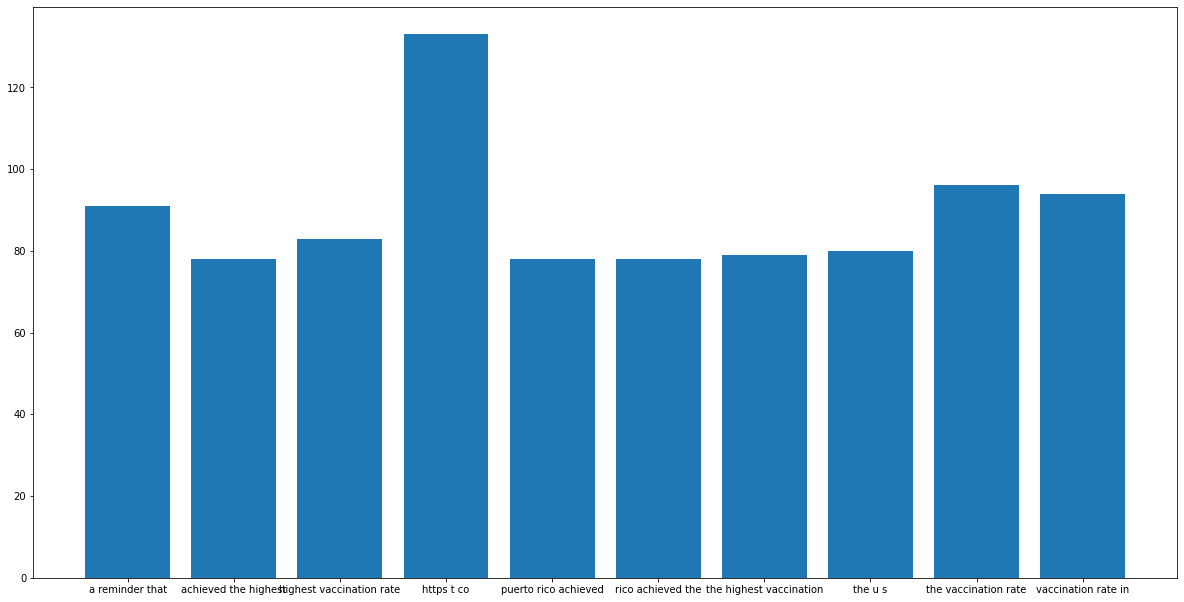

In [34]:
unigram_fd = dict(Counter(unigrams).most_common(10)) # Displaying top 10 due to visual space constraint

lists = sorted(unigram_fd.items())
fig1 = plt.figure()
x, y = zip(*lists)
fig1.set_size_inches(20.5, 10.5)
plt.bar(x, y)
plt.show()

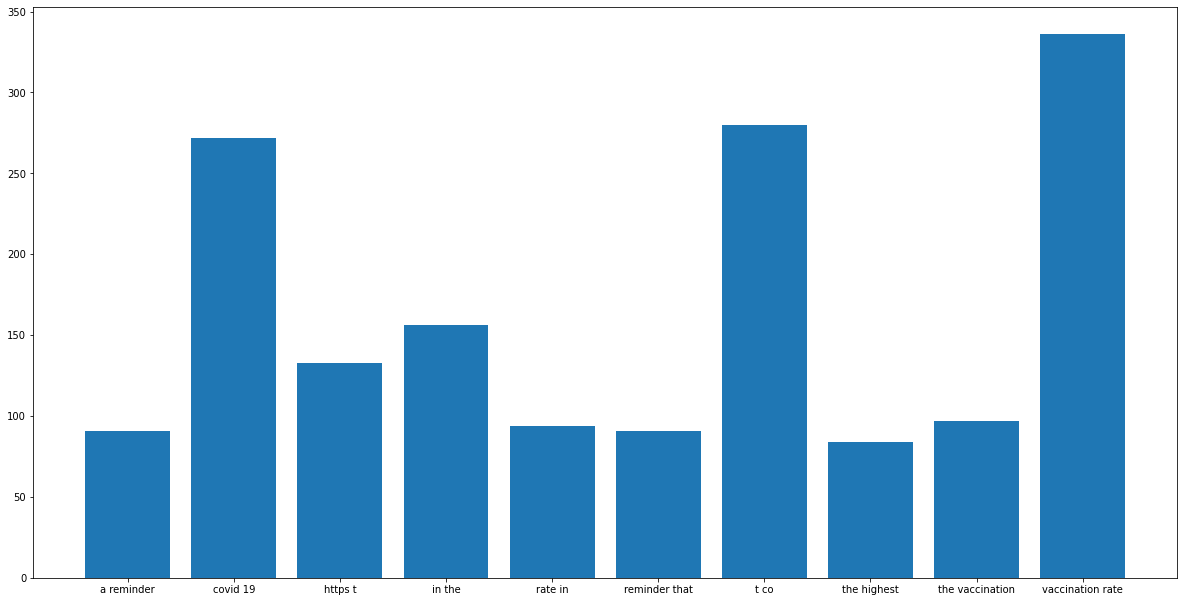

In [35]:
bigrams_fd = dict(Counter(bigrams).most_common(10)) # Displaying top 10 due to visual space constraint

lists = sorted(bigrams_fd.items())
fig1 = plt.figure()
x, y = zip(*lists)
fig1.set_size_inches(20.5, 10.5)
plt.bar(x, y)
plt.show()

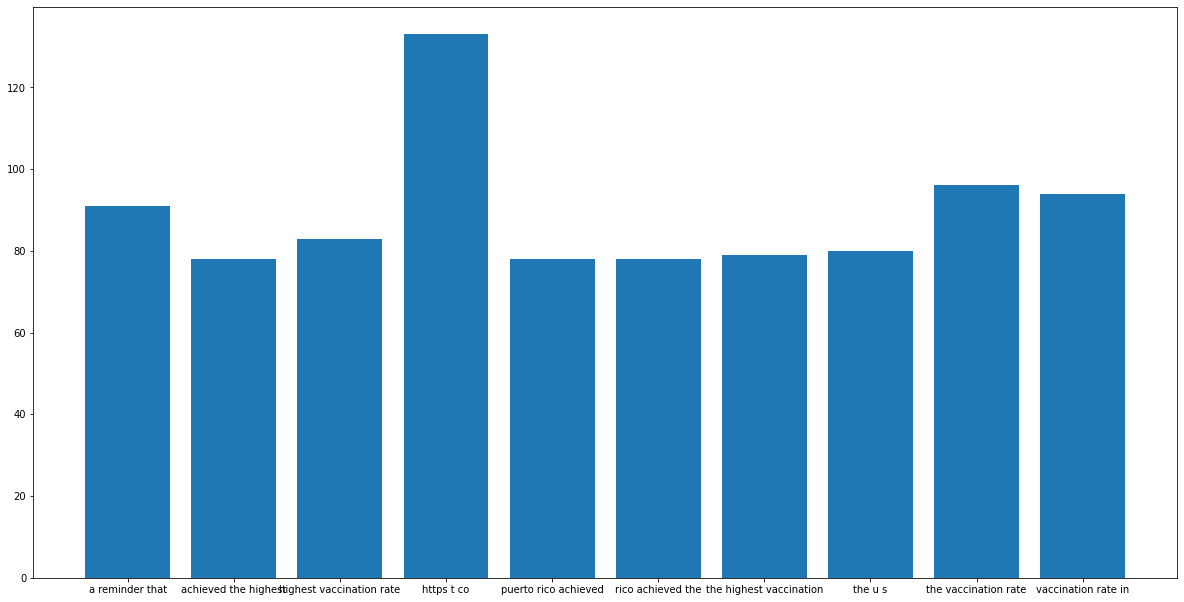

In [36]:
trigrams_fd = dict(Counter(trigrams).most_common(10)) # Displaying top 10 due to visual space constraint

lists = sorted(trigrams_fd.items())
fig1 = plt.figure()
x, y = zip(*lists)
fig1.set_size_inches(20.5, 10.5)
plt.bar(x, y)
plt.show()